In [65]:
from keras.preprocessing import image
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Loaded 33 files: ['10.11.22.150[Jul_13_2023_19_02_07].png', '10.11.22.150[Jul_13_2023_19_10_30].png', '10.11.22.150[Jul_13_2023_19_11_34].png', '10.11.22.150[Jul_15_2023_11_01_57].png', '10.11.22.150[Jul_15_2023_11_05_26].png', '10.11.22.150[Oct_04_2023_17_59_44]_G-3.png', '10.11.22.150[Oct_04_2023_18_00_21]_G-3.png', '10.11.22.150[Oct_04_2023_18_00_48]_G-3.png', '10.11.22.150[Oct_04_2023_18_02_02]_G-3.png', '10.11.22.150[Oct_04_2023_18_02_11]_G-3.png', '10.11.22.150[Oct_04_2023_18_02_28]_G-3.png', '2gun2.png', 'S-1.png', 'S-2.png', 'S-3.png', 's1.png', 'S1_mel.png', 's2.png', 'S2_mel.png', 's3.png', 'S3_mel.png', 's4.png', 'S4_mel.png', 's5.png', 'S5_mel.png', 's6.png', 'S6_mel.png', 'S7_mel.png', 'S8_mel.png', 'S9_mel.png', 'snipper1.png', 'snipper2.png', 'snipper3.png']
Total images loaded: 33


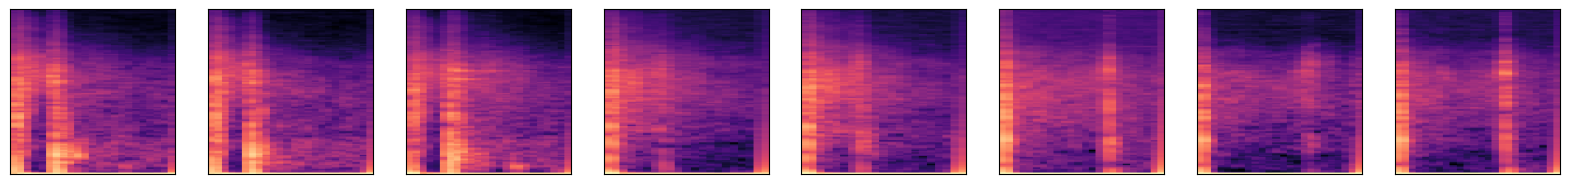

In [66]:
def load_images_from_path(path, label):
    images = []
    labels = []
    loaded_files = []

    for file in os.listdir(path):
        try:
            img_path = os.path.join(path, file)
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            images.append(img_array)
            labels.append(label)
            loaded_files.append(file)
        except Exception as e:
            print(f"Error loading image {file}: {e}")
        
    print(f"Loaded {len(loaded_files)} files: {loaded_files}")
    return np.array(images), np.array(labels)

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255.0)


x = []
y = []
images, labels = load_images_from_path('dataset/', 0)
show_images(images)

x.extend(images)
y.extend(labels)

print(f"Total images loaded: {len(x)}")
print(f"Total images labeled: {len(y)}")

In [57]:
x = np.array(x)
y = np.array(y)

In [58]:
num_classes = 4  # Update according to your data
y_encoded = to_categorical(y, num_classes)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, stratify=y, test_size=0.3, random_state=0)

In [60]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [61]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(num_classes, activation='softmax')
])

c:\Users\Personal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 109, 109, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │    18,875,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,212,548 (73.29 MB)

 Trainable params: 19,212,548 (73.29 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
hist = model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), batch_size=10, epochs=10)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 632ms/step - accuracy: 0.4076 - loss: 0.8431 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 553ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 484ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 432ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 475ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 433ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 540ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 464ms/step - accuracy: 1.00

[]

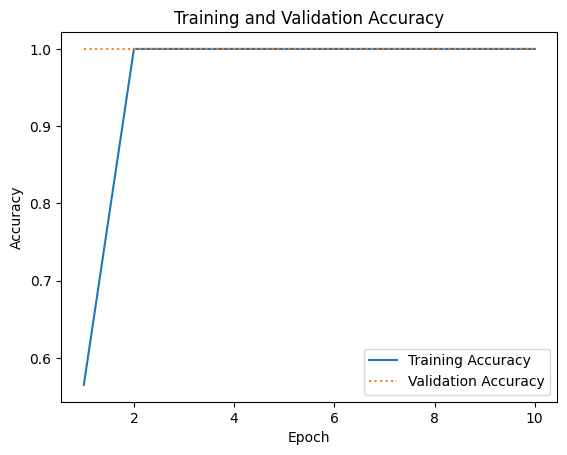

In [64]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()